# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
data = pd.read_csv('data_clustering.csv')

In [4]:
data.head()

,K&A,DD,AoW,AoM,DV,WT,Cluster
0,0.003576,0.000000,0.005251,0.000318,0.000473,0.0,0
1,0.069566,0.023376,0.057227,0.000425,0.053613,0.0,0
2,0.011118,0.027734,0.118697,0.017088,0.036086,0.0,0
3,0.000390,0.000792,0.001145,0.000743,0.000473,0.0,0
4,0.055718,0.026545,0.050899,0.011781,0.157531,0.0,0


In [5]:
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   K&A      507 non-null    float64
 1   DD       507 non-null    float64
 2   AoW      507 non-null    float64
 3   AoM      507 non-null    float64
 4   DV       507 non-null    float64
 5   WT       507 non-null    float64
 6   Cluster  507 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 27.9 KB


In [6]:
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
K&A        0
DD         0
AoW        0
AoM        0
DV         0
WT         0
Cluster    0
dtype: int64


In [7]:
data = data.drop(columns=['Cluster', 'AoW', 'DV', 'WT'])

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [8]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()
threshold1 = 0.5
threshold2 = 0.75

# Normalisasi semua kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['DD'])
y = data['DD']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Mengonversi Data Kontinu menjadi Diskrit
y_train = np.where(y_train < threshold1, 0, np.where(y_train < threshold2, 1, 2))
y_test = np.where(y_test < threshold1, 0, np.where(y_test < threshold2, 1, 2))

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(405, 2), y_train=(405,)
Test set shape: X_test=(102, 2), y_test=(102,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [10]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

# Evaluate each model and print F1 scores
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.921569   0.908173  0.921569  0.891323
1            Decision Tree (DT)  0.843137   0.869690  0.843137  0.856145
2            Random Forest (RF)  0.921569   0.901694  0.921569  0.905800
3  Support Vector Machine (SVM)  0.911765   0.831315  0.911765  0.869683
4              Naive Bayes (NB)  0.882353   0.828877  0.882353  0.854779


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


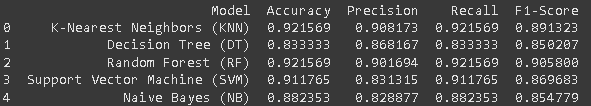

Algoritma KNN yang terbaik diantara algoritma lainnya.

Confusion Matrix for K-Nearest Neighbors (KNN):


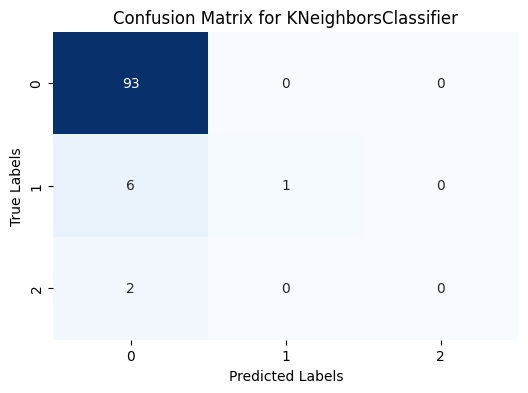

Confusion Matrix for Decision Tree (DT):


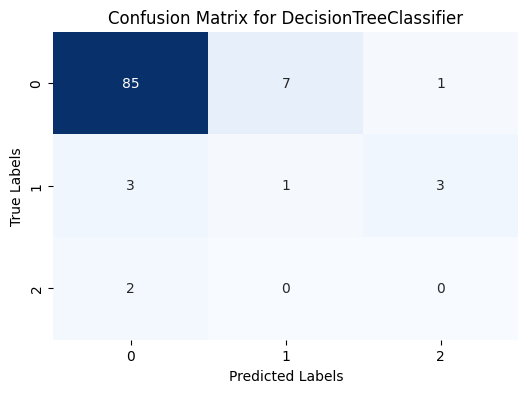

Confusion Matrix for Random Forest (RF):


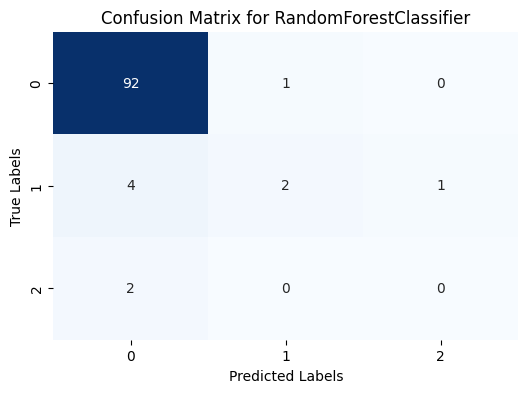

Confusion Matrix for Support Vector Machine (SVM):


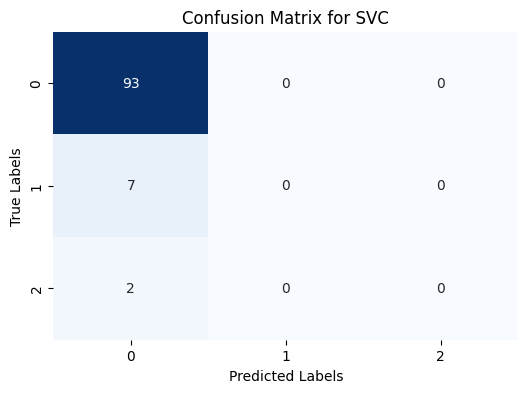

Confusion Matrix for Naive Bayes (NB):


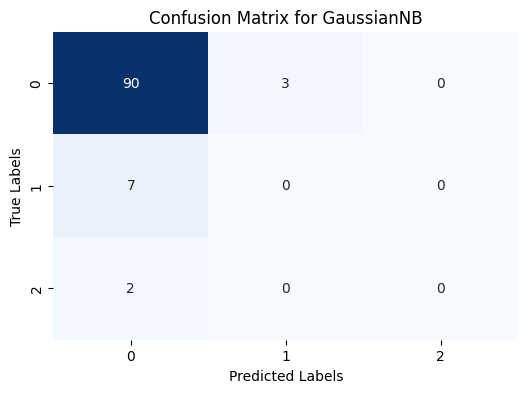

In [11]:
# Function to evaluate model and display confusion matrix
def evaluate_model_with_confusion(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

# Evaluate each model and display confusion matrices
models = {
    'K-Nearest Neighbors (KNN)': knn,
    'Decision Tree (DT)': dt,
    'Random Forest (RF)': rf,
    'Support Vector Machine (SVM)': svm,
    'Naive Bayes (NB)': nb
}

for model_name, model in models.items():
    print(f"Confusion Matrix for {model_name}:")
    evaluate_model_with_confusion(model, X_test, y_test)

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [20]:
# Definisikan ruang pencarian untuk Bayesian Optimization
param_space_knn = {
    'n_neighbors': (1, 5),              # Number of neighbors to consider
    'weights': ['distance', 'uniform'],  # Weight function used in prediction
    'metric': ['minkowski', 'manhattan', 'euclidean']  # Distance metric
}

# Inisialisasi BayesSearchCV
knn = KNeighborsClassifier()
bayes_search_knn = BayesSearchCV(estimator=knn, search_spaces=param_space_knn, n_iter=24, cv=6, n_jobs=-1, verbose=3, random_state=24)
bayes_search_knn.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization for KNN): {bayes_search_knn.best_params_}")
best_knn_bayes = bayes_search_knn.best_estimator_

# Evaluasi performa model pada test set
knn_bayes_search_score = best_knn_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization (KNN): {knn_bayes_search_score:.2f}")

Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fi

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['minkowski', 2, 'uniform'] before, using random point ['euclidean', 1, 'distance']
  warnings.warn(


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Best parameters (Bayesian Optimization for KNN): OrderedDict([('metric', 'euclidean'), ('n_neighbors', 4), ('weights', 'uniform')])
Accuracy after Bayesian Optimization (KNN): 0.93


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [21]:
# Output the best parameters and best estimator
print(f"Best parameters (Bayesian Optimization for KNN): {bayes_search_knn.best_params_}")
best_knn_bayes = bayes_search_knn.best_estimator_

# Evaluate the optimized KNN model on the test set
knn_bayes_search_score = best_knn_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization (KNN): {knn_bayes_search_score:.2f}")

Best parameters (Bayesian Optimization for KNN): OrderedDict([('metric', 'euclidean'), ('n_neighbors', 4), ('weights', 'uniform')])
Accuracy after Bayesian Optimization (KNN): 0.93


Akurasi Model Sebelum Tuning:

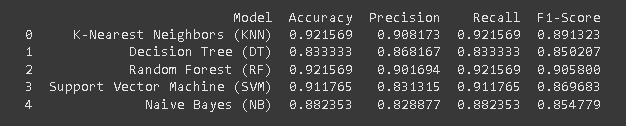

In [29]:
# Evaluate each model and print F1 scores
results = {
    'K-Nearest Neighbors (KNN) Tuned': evaluate_model(bayes_search_knn, X_test, y_test),
}

summary_df = pd.DataFrame(rows)

print("Akurasi Model Setelah Tuning")
print(summary_df)

Akurasi Model Setelah Tuning
                             Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors (KNN) Tuned  0.931373   0.936176  0.931373  0.908924


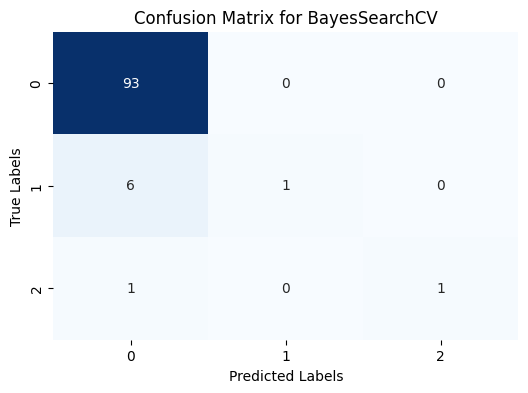

In [24]:
evaluate_model_with_confusion(bayes_search_knn, X_test, y_test)

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.

1. Perbandingan Hasil Sebelum dan Sesudah Tuning
Peningkatan Akurasi KNN: Setelah dilakukan optimasi Bayesian, akurasi model K-Nearest Neighbors (KNN) meningkat dari sekitar 0,9217 menjadi 0,9314. Hal ini menunjukkan adanya dampak positif dari proses tuning.
Peningkatan Precision, Recall, dan F1-Score: Precision, recall, dan F1-score model KNN yang telah dituning juga mengalami peningkatan, yang menunjukkan peningkatan efektivitas model dalam memprediksi setiap kelas dengan benar.

2. Kelemahan Model
Performa Spesifik Kelas: Jika memungkinkan, disarankan untuk memeriksa precision dan recall untuk setiap kelas secara individual (melalui confusion matrix) guna mengidentifikasi apakah terdapat kelas-kelas tertentu yang sulit diprediksi oleh model. Nilai precision atau recall yang rendah pada kelas tertentu dapat mengindikasikan bahwa model mengalami kesulitan dalam membedakan kelas-kelas tersebut.
Overfitting atau Underfitting: Jika model yang telah dituning menunjukkan performa yang secara signifikan lebih baik pada data pelatihan dibandingkan data uji, hal ini mungkin menandakan terjadinya overfitting. Sebaliknya, jika akurasi pada data pelatihan dan data uji sama-sama rendah, model mungkin mengalami underfitting.

3. Rekomendasi Langkah Selanjutnya
Mengumpulkan Data Tambahan: Jika model menunjukkan performa yang tidak konsisten antar kelas atau data yang digunakan tidak seimbang, pengumpulan sampel tambahan, terutama untuk kelas yang kurang terwakili, dapat meningkatkan performa model.
Mencoba Algoritme Lain: Jika KNN belum memberikan hasil yang memuaskan, dapat dipertimbangkan untuk mencoba algoritme lain, seperti gradient boosting atau support vector machines (SVM) dengan optimasi hyperparameter. Tuning Hyperparameter Lebih Lanjut: Eksperimen dengan metode tuning hyperparameter lain atau optimasi terhadap parameter tambahan mungkin dapat menghasilkan hasil yang lebih baik.